In [446]:
import pandas as pd
from sklearn.cluster import KMeans
import collections
import matplotlib.pyplot as plt
from matplotlib import colors
import pylab as pl
%matplotlib inline

import scipy.stats as stats

import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

#special matplotlib argument for improved plots
from matplotlib import rcParams

In [447]:
data = pd.read_csv(r'C:\Users\PB\Downloads\CarsNew.csv')
data = data.loc[data['Year'].isin([2012, 2013])]

In [448]:
kmeans_data = data.fillna(0)
kmeans_data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200


In [449]:
kmeans_data.shape

(753, 16)

In [450]:
kmeans_data.keys()

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [451]:
columns = ['Model', 'Engine Fuel Type','Transmission Type', 'Driven_Wheels','Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style']

#remove white spaces in columns names:
kmeans_data.columns = kmeans_data.columns.str.strip()

#drop unwated columns:
kmeans_data.drop(columns, inplace=True, axis=1)
kmeans_data.head()


,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,BMW,2012,230.0,6.0,28,18,3916,31200
6,BMW,2012,300.0,6.0,26,17,3916,44100
7,BMW,2012,300.0,6.0,28,20,3916,39300
8,BMW,2012,230.0,6.0,28,18,3916,36900
9,BMW,2013,230.0,6.0,27,18,3916,37200


In [452]:
kmeans_data.Make = pd.Categorical(kmeans_data.Make)
kmeans_data['Make_code'] = kmeans_data.Make.cat.codes
kmeans_data.head(5)

,Make,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP,Make_code
5,BMW,2012,230.0,6.0,28,18,3916,31200,3
6,BMW,2012,300.0,6.0,26,17,3916,44100,3
7,BMW,2012,300.0,6.0,28,20,3916,39300,3
8,BMW,2012,230.0,6.0,28,18,3916,36900,3
9,BMW,2013,230.0,6.0,27,18,3916,37200,3


In [453]:
kmeans_data.keys()
#kmeans_data.brand.cat.categories

Index(['Make', 'Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Make_code'],
      dtype='object')

In [454]:
col1 = ['Year', 'Engine HP', 'Engine Cylinders', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP']
selected = kmeans_data[col1]
selected.head(8)

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,Popularity,MSRP
5,2012,230.0,6.0,28,18,3916,31200
6,2012,300.0,6.0,26,17,3916,44100
7,2012,300.0,6.0,28,20,3916,39300
8,2012,230.0,6.0,28,18,3916,36900
9,2013,230.0,6.0,27,18,3916,37200
10,2013,300.0,6.0,28,20,3916,39600
11,2013,230.0,6.0,28,19,3916,31500
12,2013,300.0,6.0,28,19,3916,44400


In [455]:
selected.values

array([[2.012e+03, 2.300e+02, 6.000e+00, ..., 1.800e+01, 3.916e+03,
        3.120e+04],
       [2.012e+03, 3.000e+02, 6.000e+00, ..., 1.700e+01, 3.916e+03,
        4.410e+04],
       [2.012e+03, 3.000e+02, 6.000e+00, ..., 2.000e+01, 3.916e+03,
        3.930e+04],
       ...,
       [2.012e+03, 3.000e+02, 6.000e+00, ..., 1.600e+01, 2.040e+02,
        5.667e+04],
       [2.012e+03, 3.000e+02, 6.000e+00, ..., 1.600e+01, 2.040e+02,
        5.062e+04],
       [2.013e+03, 3.000e+02, 6.000e+00, ..., 1.600e+01, 2.040e+02,
        5.092e+04]])

0
1
2
3
4
5
6
7
8


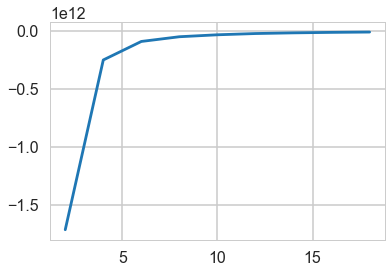

In [456]:
def optimal_clusters(df):
    Nc = range(2, 20, 2)
    data_km = df.values
    kmeans = [KMeans(n_clusters=i) for i in Nc]
    score = []
    for i in range(len(kmeans)):
        print(i)
        score.append(kmeans[i].fit(data_km).score(data_km))
    return Nc, score
#Nc, score = optimal_clusters(df_kmeans)
Nc, score = optimal_clusters(selected)
pl.plot(Nc,score)

In [457]:
    kmeans_model = KMeans(n_clusters=6)
    kmeans_model.fit(selected)
    kmeans_model = kmeans_model.fit(selected)
    print(kmeans_model)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [458]:
data_label = kmeans_model.predict(selected)
collections.Counter(data_label)

Counter({0: 519, 5: 166, 4: 20, 1: 42, 3: 5, 2: 1})

In [490]:
from sklearn import preprocessing

x = selected.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
selected = pd.DataFrame(x_scaled)
selected.head(1)

,0,1,2,3,4,5,6
0,0.0,0.314637,0.5,0.144444,0.065574,0.688551,0.012783


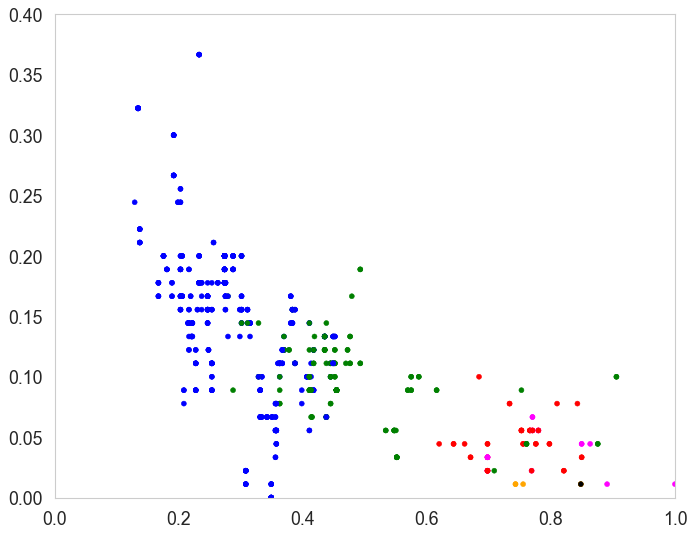

In [504]:
#HP Vs HighwayMPG

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green']
plt.scatter(selected.iloc[:, 1], selected.iloc[:, 3], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
#plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,3],s=100,marker='*',c='red',label='centroids')
plt.ylim(0,0.4)
plt.xlim(0,1)
plt.grid()
plt.show()

# HP Vs CityMPG

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['black', 'lime', 'red', 'yellow']
plt.scatter(selected.iloc[:, 1], selected.iloc[:, 4], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,4],s=200,marker='*',c='red',label='centroids')
plt.ylim(0,45)
plt.grid()
plt.show()


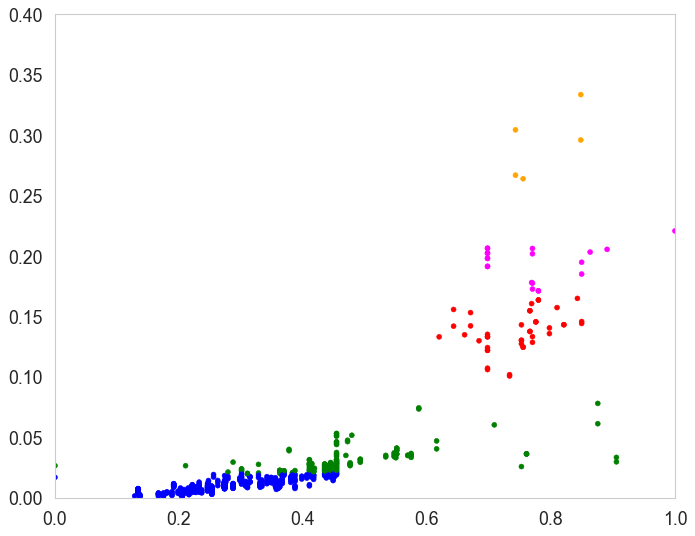

In [506]:

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
color_map=['blue', 'red', 'black', 'orange', 'magenta', 'green']
plt.scatter(selected.iloc[:, 1], selected.iloc[:, 6], c=data_label, s=20, cmap=colors.ListedColormap(color_map))
plt.scatter(kmeans_model.cluster_centers_[:,1],kmeans_model.cluster_centers_[:,6],s=250,marker='*',c='red',label='centroids')
plt.ylim(0,0.4)
plt.xlim(0,1)
plt.grid()
plt.show()

In [507]:
selected[:1]

,0,1,2,3,4,5,6
0,0.0,0.314637,0.5,0.144444,0.065574,0.688551,0.012783


In [508]:
selected.iloc[:,]

,0,1,2,3,4,5,6
0,0.0,0.314637,0.500000,0.144444,0.065574,0.688551,0.012783
1,0.0,0.410397,0.500000,0.122222,0.057377,0.688551,0.022206
2,0.0,0.410397,0.500000,0.144444,0.081967,0.688551,0.018700
3,0.0,0.314637,0.500000,0.144444,0.065574,0.688551,0.016947
4,1.0,0.314637,0.500000,0.133333,0.065574,0.688551,0.017166
5,1.0,0.410397,0.500000,0.144444,0.081967,0.688551,0.018919
6,1.0,0.314637,0.500000,0.144444,0.073770,0.688551,0.013002
7,1.0,0.410397,0.500000,0.144444,0.073770,0.688551,0.022425
8,1.0,0.314637,0.500000,0.144444,0.073770,0.688551,0.017166
9,1.0,0.314637,0.500000,0.144444,0.073770,0.688551,0.013002


In [509]:
print(selected.describe())

                0           1           2           3           4           5  \
count  753.000000  753.000000  753.000000  753.000000  753.000000  753.000000   
mean     0.486056    0.363351    0.476428    0.134396    0.082457    0.188931   
std      0.500138    0.168136    0.185214    0.079798    0.061760    0.205453   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.253078    0.333333    0.088889    0.057377    0.074061   
50%      0.000000    0.310534    0.416667    0.133333    0.073770    0.144186   
75%      1.000000    0.437756    0.500000    0.177778    0.098361    0.245438   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6  
count  753.000000  
mean     0.029626  
std      0.058345  
min      0.000000  
25%      0.008324  
50%      0.012645  
75%      0.023228  
max      1.000000  


In [510]:
#Split training and testing data:
#Y = Car Price
#X = All other features

import sklearn.cross_validation
sklearn.model_selection.train_test_split

X = selected.drop('MSRP', axis = 1)
Y = selected['MSRP']


X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



KeyError: "labels ['MSRP'] not contained in axis"

In [511]:
#Linear Regression:

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)
print(Y_pred)



[ 5.08787479e+04  9.64180747e+04  9.00183032e+03  1.46272233e+04
  2.13991296e+05  6.66881938e+04  2.49068072e+05  1.50290830e+04
  5.91861013e+04  6.49179839e+04 -1.12780675e+04  2.39941047e+05
  4.13805300e+04  5.35873946e+04  4.33095535e+03  7.91973871e+04
  1.46272233e+04  9.77470312e+03  4.67329337e+04  8.06007378e+04
  2.39941047e+05  2.37603745e+05  9.77470312e+03  1.12268279e+05
  1.57781773e+04  1.05295239e+05 -4.31198614e+03  5.79008728e+03
  5.53747309e+04  3.45545016e+04  2.10424956e+04 -4.63637468e+03
  1.89072105e+04  4.67329337e+04  3.19786378e+04  2.50683558e+04
  2.03965228e+03  6.55938611e+04  1.48810149e+05  9.74035423e+04
  1.78426716e+04  2.77843744e+04  1.13191514e+05  7.05166906e+04
  6.15191910e+03  1.52890724e+04  7.07353805e+04  1.89072105e+04
  2.75630545e+04  7.80740653e+04  1.89072105e+04  5.08787479e+04
  7.07729909e+04  6.53558279e+04  2.49068072e+05  1.35973749e+05
  1.48330305e+04  1.76303325e+05  2.02259299e+04  2.96766848e+04
  2.77843744e+04 -6.78165

<Figure size 800x640 with 0 Axes>

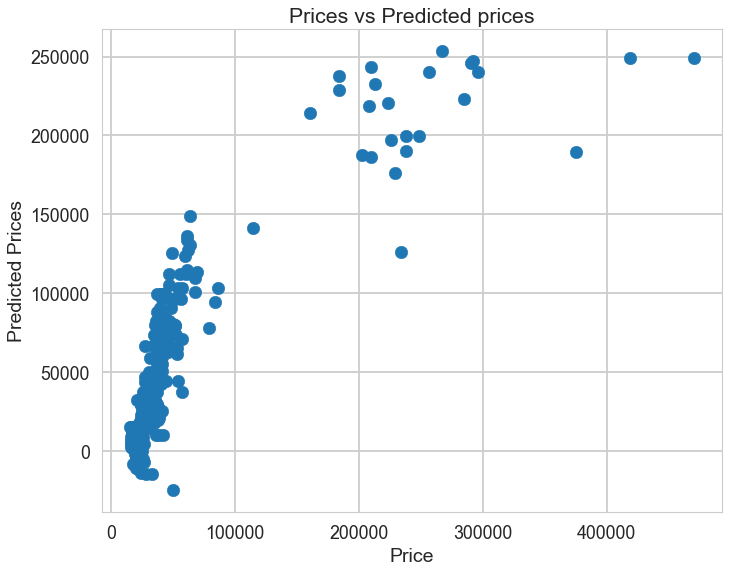

In [519]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(Y_test, Y_pred)
plt.xlabel("Price")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted prices");
# plt.xlim(0,100000)
# plt.ylim(0,100000)


#plt.scatter(Y_test, Y_pred)

C:\Users\PB\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


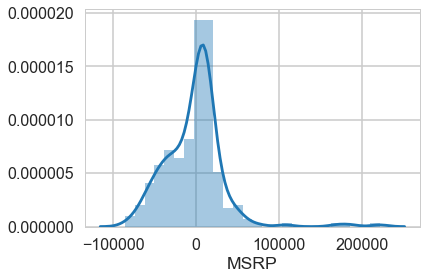

In [520]:
sns.distplot((Y_test-Y_pred))

In [521]:
#Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
#1n∑i=1n|yi−ŷ i|

from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,Y_pred))

24339.92925847998


In [522]:
# Mean Squared Error (MSE) is the mean of the squared errors:
# 1n∑i=1n(yi−ŷ i)2

print('MSE:', metrics.mean_squared_error(Y_test, Y_pred))

MSE: 1310456396.2780104


In [523]:
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
# 1n∑i=1n(yi−ŷ i)2

import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

RMSE: 36200.22646721993


In [488]:
# Comparing these metrics:
# MAE is the easiest to understand, because it's the average error.
# MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
# RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. 
# All of these are loss functions, because we want to minimize them.